In [14]:
import sklearn
import numpy as np     
import csv 
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

# Tick parameters
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 15

In [41]:
grain_size = [0.8476, 0.845, 9.4598, 19.3864, 18.1735, 20.8162, 21.273, 19.6352, 
              27.6082, 40.3989, 49.4007]
time_hrs=[0.0, 0.01666667,0.033333333,0.08333333,0.25,0.5,1.0,4.0,16.0,64.0,128.0]
grain_size_std = [0.3473,0.4004,4.7266,9.9639,12.7622,12.8689,12.3655,12.8878,
                  17.883,29.0373,23.4149]

# Dislocation Density
rho = [1.32E+15, 8.18E+14, 8.24E+14, 8.19E+14, 8.16E+14, 8.19E+14, 8.19E+14, 
       7.94E+14, 8.10E+14, 8.11E+14, 8.18E+14]

# Precipitates
delE_fi = np.float64([54.04463583, 38.22793652, 33.08522909, 38.4821365, 29.41102517, 
           30.71222444, 20.96858143, 21.11874509, 16.87853317, 11.48786286, 
           10.49404503])

ternary_part_spacing = np.float64([0.003292, 0.002540, 0.002290, 0.002425, 0.002331, 
                        0.002332, 0.002537, 0.002202, 0.002376, 0.001894, 0.001290])

binary_part_spacing = np.float64([0.002087, 0.001821, 0.001944, 0.001665, 0.002057, 0.001311, 
                       0.001728, 0.001547, 0.001206, 0.001536, 0.000848])

mn_part_spacing = np.float64([0.001634, 0.001125, 0.000829, 0.001006, 0.001510, 0.001005, 
                   0.001105, 0.001418, 0.000939, 0.000778, 0.000956])

corrosion_rate = [7.78,4.54,4.47,4.39,4.7,4.83,4.31,2.86,2.7,1.9,1.84]
hardness = [69.29, 66.037, 47.372, 44.944, 48.975, 46.71, 44.47, 41.87, 38.56, 35.97, 35.02]


## Grain Size

0.9070361489895047


Text(0, 0.5, 'Mean Grain Size [$\\mu$m]')

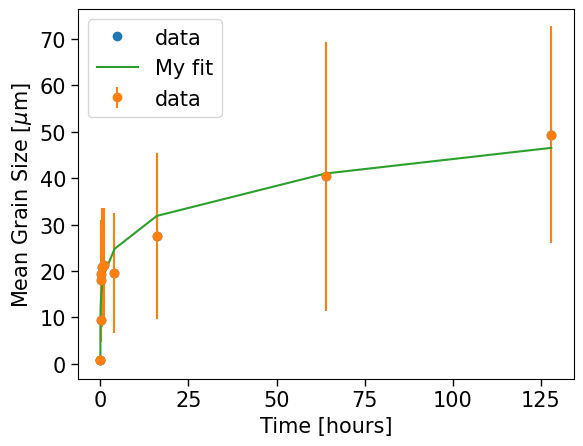

In [19]:
grain_size_m = [grain_size_i - grain_size_std_i  for grain_size_i, grain_size_std_i  in zip(grain_size, grain_size_std)] 
grain_size_p = [grain_size_i + grain_size_std_i  for grain_size_i, grain_size_std_i  in zip(grain_size, grain_size_std)]  

# grain_size = [0.8476, 0.845, 9.4598, 19.6352, 27.6082, 40.3989, 49.4007]
# time_hrs=[0.0, 0.01666667,0.033333333,4.0,16.0,64.0,128.0]

def grain_growth_func(time, n, k):
    y = np.power((np.float64(0.8476)**np.float64(n)+np.float64(k)*np.float64(time)),(1.0/np.float64(n)))
    return y

parameters, covariance = curve_fit(grain_growth_func, time_hrs, grain_size)
fit_n = parameters[0]
fit_k = parameters[1]

fit_cosine = grain_growth_func(time_hrs, fit_n, fit_k)
print(r2_score(grain_size, fit_cosine))

sreenivas_fit = np.power((np.float64(0.8476)**np.float64(3.8)+np.float64(32370.85)*np.float64(time_hrs)),(1.0/np.float64(3.8)))

# plt.xscale("log")
plt.plot(time_hrs, grain_size, 'o', label='data')
plt.errorbar(time_hrs, grain_size, yerr=grain_size_std, fmt="o", label='data')
plt.plot(time_hrs, fit_cosine, '-', label='My fit')
# plt.plot(time_hrs, sreenivas_fit, '-', label='Sreenivas fit')

plt.legend(loc='upper left')
plt.xlabel('Time [hours]')
plt.ylabel('Mean Grain Size [$\mu$m]')

## Ralston-Birbilis model

0.46650914122831


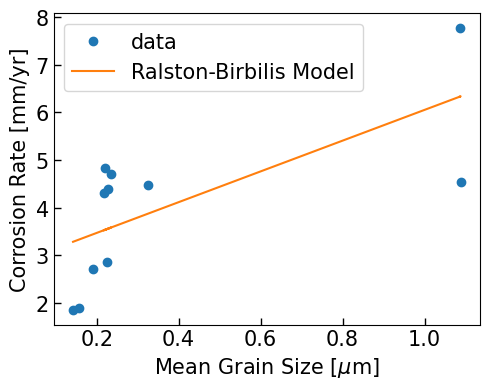

In [11]:
save_plot = True

def ralston_birbilis_model(gs, a, b):
    y = a + b*gs
    return y

grain_size_1_sqrt = np.power(grain_size,-0.5)
parameters, covariance = curve_fit(ralston_birbilis_model, grain_size_1_sqrt, corrosion_rate)
fit_a = parameters[0]
fit_b = parameters[1]

fit_cor_gs = ralston_birbilis_model(grain_size_1_sqrt, fit_a, fit_b)
print(r2_score(corrosion_rate, fit_cor_gs))

fig,ax = plt.subplots(figsize=(5, 4))
plt.plot(grain_size_1_sqrt, corrosion_rate, 'o', label='data')
plt.plot(grain_size_1_sqrt, fit_cor_gs, '-', label='Ralston-Birbilis Model')
ax.tick_params(direction='in')

plt.legend(loc='upper left')
plt.xlabel('Mean Grain Size [$\mu$m]')
plt.ylabel('Corrosion Rate [mm/yr]')
# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'ralston_birbilis.pdf',
                bbox_inches='tight')


## Bahmani Precipitates Model

0.87218989419203


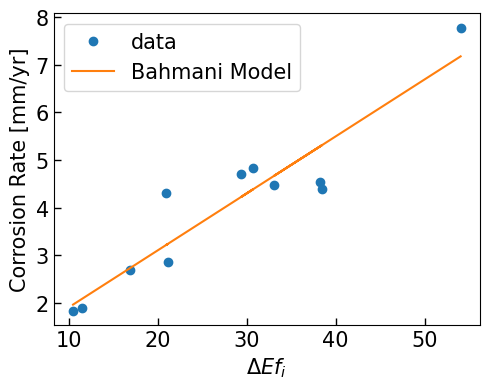

In [12]:
def bahmani_precipitates_model(delE_f, a, b):
    y = a + b*delE_f
    return y

parameters, covariance = curve_fit(ralston_birbilis_model, delE_fi, corrosion_rate)
fit_a_bahmani = parameters[0]
fit_b_bahmani = parameters[1]

fit_cor_precipitates = bahmani_precipitates_model(delE_fi, fit_a_bahmani, fit_b_bahmani)
print(r2_score(corrosion_rate, fit_cor_precipitates))

fig, ax = plt.subplots(figsize=(5,4))
plt.plot(delE_fi, corrosion_rate, 'o', label='data')
plt.plot(delE_fi, fit_cor_precipitates, '-', label='Bahmani Model')
ax.tick_params(direction='in')

plt.legend(loc='upper left')
plt.xlabel('$\Delta E f_i$')
plt.ylabel('Corrosion Rate [mm/yr]')

# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'bahmani.pdf',
                bbox_inches='tight')


In [39]:
def bahmani_model(delE_f, a, b):
    y = a + b*delE_f
    return y

parameters, covariance = curve_fit(ralston_birbilis_model, delE_fi, corrosion_rate)
fit_a_bahmani = parameters[0]
fit_b_bahmani = parameters[1]

fit_cor_precipitates = bahmani_model(delE_fi, fit_a_bahmani, fit_b_bahmani)
print(r2_score(corrosion_rate, fit_cor_precipitates))

fig = plt.figure(figsize=(5,5))
plt.plot(delE_fi, corrosion_rate, 'o', label='data')
plt.plot(delE_fi, fit_cor_precipitates, '-', label='Bahmani Model')

plt.legend(loc='upper left')
plt.xlabel('$\Delta E f_i$')
plt.ylabel('Corrosion Rate')

array([0.71593123, 0.1195259 ])

## Hardness Hall-Petch Model

0.8938723311979514


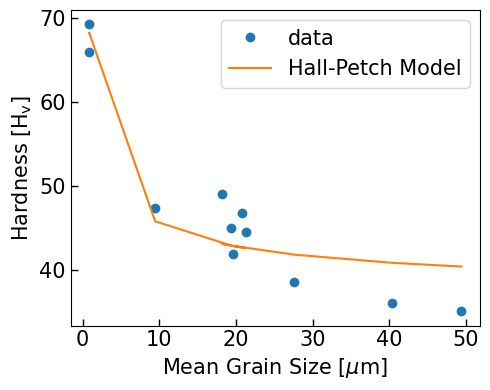

In [22]:
save_plot = True

def hall_petch_model(gs, a, b):
    y = a + b*gs
    return y

grain_size_1_sqrt = np.power(grain_size,-0.5)
parameters, covariance = curve_fit(hall_petch_model, grain_size_1_sqrt, hardness)
fit_a = parameters[0]
fit_b = parameters[1]

fit_hardness_gs = halls_petch_model(grain_size_1_sqrt, fit_a, fit_b)
print(r2_score(hardness, fit_hardness_gs))

fig,ax = plt.subplots(figsize=(5, 4))
plt.plot(grain_size, hardness, 'o', label='data')
plt.plot(grain_size, fit_hardness_gs, '-', label='Hall-Petch Model')
ax.tick_params(direction='in')

plt.legend(loc='upper right')
plt.xlabel('Mean Grain Size [$\mu$m]')
plt.ylabel('Hardness [H$_{\mathrm{v}}$]')

# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'hardness_hall_petch.pdf',
                bbox_inches='tight')


## Hardness Orowan Ppt

0.6251211899364945


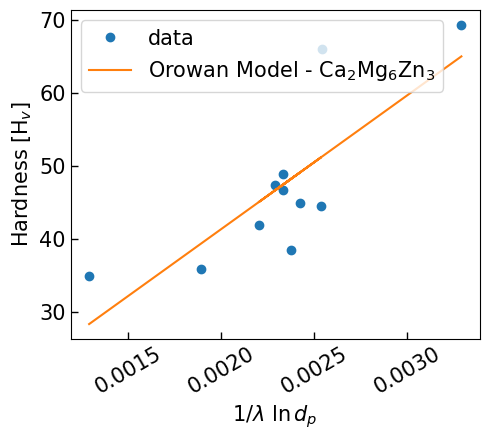

In [67]:
save_plot = True

def orowan_model(ppt, a, b):
    y = a + b*ppt
    return y

parameters, covariance = curve_fit(orowan_model, ternary_part_spacing, hardness)
fit_a = parameters[0]
fit_b = parameters[1]

fit_hardness_gs = orowan_model(ternary_part_spacing, fit_a, fit_b)
print(r2_score(hardness, fit_hardness_gs))

fig,ax = plt.subplots(figsize=(5, 4.5))
plt.plot(ternary_part_spacing, hardness, 'o', label='data')
plt.plot(ternary_part_spacing, fit_hardness_gs, '-', label='Orowan Model - Ca$_{\mathrm{2}}$Mg$_{\mathrm{6}}$Zn$_{\mathrm{3}}$')
ax.tick_params(direction='in')

plt.legend(loc='upper left')
plt.xlabel('1$/\lambda \ \ln d_p$')
plt.xticks(rotation=30)
plt.ylabel('Hardness [H$_v$]')
# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'hardness_orowan_ternary.pdf',
                bbox_inches='tight')


0.4714850062517204


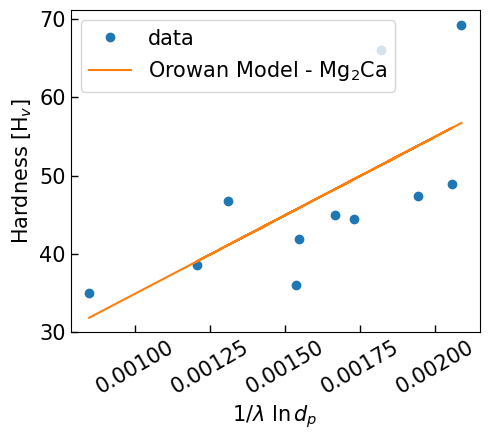

In [65]:
save_plot = True

def orowan_model(ppt, a, b):
    y = a + b*ppt
    return y

parameters, covariance = curve_fit(orowan_model, binary_part_spacing, hardness)
fit_a = parameters[0]
fit_b = parameters[1]

fit_hardness_gs = orowan_model(binary_part_spacing, fit_a, fit_b)
print(r2_score(hardness, fit_hardness_gs))

fig,ax = plt.subplots(figsize=(5, 4.5))
plt.plot(binary_part_spacing, hardness, 'o', label='data')
plt.plot(binary_part_spacing, fit_hardness_gs, '-', label='Orowan Model - Mg$_{\mathrm{2}}$Ca')
ax.tick_params(direction='in')

plt.legend(loc='upper left')
plt.xlabel('1$/\lambda \ \ln d_p$')
plt.xticks(rotation=30)
plt.ylabel('Hardness [H$_v$]')
# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'hardness_orowan_binary.pdf',
                bbox_inches='tight')


0.34012156723273446


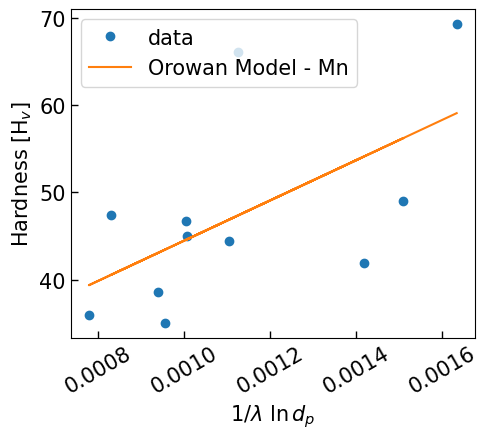

In [66]:
save_plot = True

def orowan_model(ppt, a, b):
    y = a + b*ppt
    return y

parameters, covariance = curve_fit(orowan_model, mn_part_spacing, hardness)
fit_a = parameters[0]
fit_b = parameters[1]

fit_hardness_gs = orowan_model(mn_part_spacing, fit_a, fit_b)
print(r2_score(hardness, fit_hardness_gs))

fig,ax = plt.subplots(figsize=(5, 4.5))
plt.plot(mn_part_spacing, hardness, 'o', label='data')
plt.plot(mn_part_spacing, fit_hardness_gs, '-', label='Orowan Model - Mn')
ax.tick_params(direction='in')

plt.legend(loc='upper left')
plt.xlabel('1$/\lambda \ \ln d_p$')
plt.xticks(rotation=30)
plt.ylabel('Hardness [H$_v$]')
# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'hardness_orowan_mn.pdf',
                bbox_inches='tight')


## Hardness Bailey Hirsch Model

0.6251211899364945


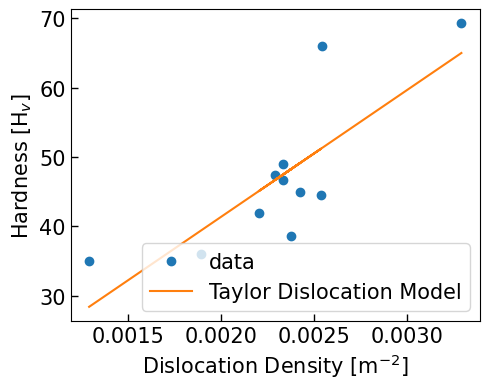

In [38]:
save_plot = True

def taylor_model(rho, a, b):
    y = a + b*rho
    return y

rho_1_sqrt = np.power(rho,0.5)
parameters, covariance = curve_fit(taylor_model, rho_1_sqrt, hardness)
fit_a = parameters[0]
fit_b = parameters[1]

fit_hardness_gs = taylor_model(rho_1_sqrt, fit_a, fit_b)
print(r2_score(hardness, fit_hardness_gs))

fig,ax = plt.subplots(figsize=(5, 4))
plt.plot(rho, hardness, 'o', label='data')
plt.plot(rho, fit_hardness_gs, '-', label='Taylor Dislocation Model')
ax.tick_params(direction='in')

plt.legend(loc='lower right')
plt.xlabel('Dislocation Density [m$^{-2}$]')
plt.ylabel('Hardness [H$_v$]')
# Adjust layout
plt.tight_layout()

if save_plot:
    plt.savefig('/Users/maitreyeesharma/WORKSPACE/PostDoc/EngChem/'+
                'Weihs_group_datasets/Sreenivas_MgAlloyColab/figures/'+
                'hardness_taylor_dislocation.pdf',
                bbox_inches='tight')
